### Treść

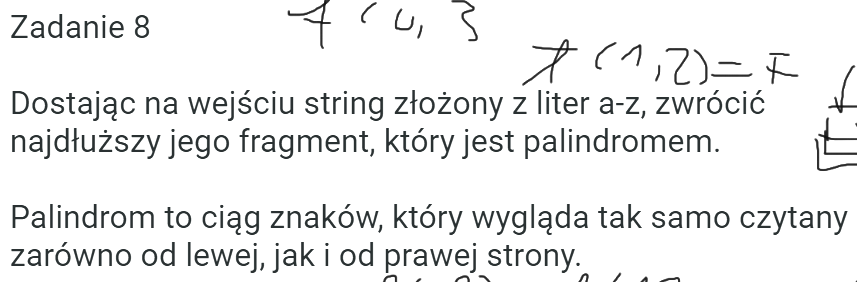

### Omówienie

###### Uwaga:
Istnieje algorytm, który rozwiązuje ten problem w czasie $ O(n) $, ale jest on nieco skomplikowany. Poniżej przykład z wykorzystaniem programowania dynamicznego, a później rozwiązanie nieco lepsze, ale niewykorzystujące programowania dynamicznego, które również działa w czasie $ O(n^2) $.

$ f(i, j) $ - informacja, czy podciąg, który rozpoczyna się pod indeksem $ i $ a kończy na indeksie $ j $ jest palindromem. <br>
W sposób rekurencyjny będziemy sprawdzać, czy kolejne podciągi są palindromami. Ponieważ dla danego $ i $, $ j $ przyjmuje wartości z zakresu $ i, i + 1, ..., n - 1 $, złożoność obliczeniowa algorytmu w notacji dużego $ O $ wynosi $ O(n^2) $. Samo sprawdzenie, czy dany podciąg to palindrom, odbywać się będzie w czasie $ O(1) $ dla każdego z podiągów, ponieważ wykorzystujemy programowanie dynamiczne i zapamiętujemy rezultat dla każdego kolejnego podciągu. <br>

### Implementacja

#### Top-down

###### UWAGA:
Podejście Top-down zazwyczaj działa bardzo wolno, bo wykorzystuje rekurencję, a wywołania funkcji sa kosztowne, jeżeli chodzi o czas wykonania (oczywiście, gdy tych wywołań jest sporo). Dużo lepsze jest podejście Bottom-up, zaprezentowane niżej, a najlepsze podejście bez użycia programowania dynamicznego. Istnieje algorytm, który działa w czasie $ O(n) $, ale go nie będziemy omawiać. Dla nas najlepszym prostym rozwiązaniem jest ostatnie z rozwiązań.

In [1]:
def get_longest_palindrome(S):
    n = len(S)
    # Create a helper array to store function results
    F = [[None] * n for _ in range(n)]

    def recur(i, j):
        if i == j: F[i][j] = True
        if i + 1 == j: F[i][j] = S[i] == S[j]
        if F[i][j] is not None: return F[i][j]
        
        # Check if the current i-j substring is a palindrome
        F[i][j] = S[i] == S[j] and recur(i + 1, j - 1)
        # Check if after removing one of characters from the
        # substring's sides we can obtain a palindrome
        recur(i + 1, j)
        recur(i, j - 1)
        return F[i][j]
    
    recur(0, n - 1)
    
    # Look for the longest palindromic substring
    length = n
    while length > 1:
        for i in range(n - length + 1):
            if F[i][i + length - 1]:
                return S[i : i + length]
        length -= 1
    # If no longer than 1-element palindrome was found, return the
    # first character of a string
    return S[0]

###### Kilka testów

In [2]:
print(get_longest_palindrome('cacabbbbaccbccbccacbca'))
# print(get_longest_palindrome('aaba'))
# print(get_longest_palindrome('ac'))

accbccbcca


#### Bottom-up

###### UWAGA:
W przypadku tego problemu, programowanie dynamiczne nie jest dobrym rozwiązaniem. Poza tym, że zużywamy $ O(n^2) $ pamięci, algorytm działa jakieś $ 8x $ wolniej niż zwykłe sprawdzanie podciągów w sposób iteracyjny bez zajmowania dodatkowej pamięci (patrz algorytm niżej - ten następny).

In [3]:
def get_longest_palindrome(S):
    n = len(S)
    if n < 2: return S
    # Create a helper array to store function results
    F = [[False] * n for _ in range(n)]
    # Fill the diagonal with ones
    # A diagonal corresponds to the substrings of length 1 as it
    # refers to the following function arguments: i == j
    for i in range(n): F[i][i] = True
    # Fill the diagonal above the main diagonal (this one will
    # refer to 2-element substrings)
    for i in range(n - 1): F[i][i + 1] = S[i] == S[i + 1]
    # Fill the remaining upper triangle based upon the results
    # of a function for shorter substrings
    k = 2
    while k < n:
        for i in range(n - k):
            j = i + k
            F[i][j] = S[i] == S[j] and F[i + 1][j - 1]
        k += 1
    # Look for the begin and end indices of the longest pallindromic
    # substring
    length = n
    while length > 1:
        for i in range(n - length + 1):
            if F[i][i + length - 1]:
                return S[i : i + length]
        length -= 1
    # If no longer than 1-element palindrome was found, return the
    # first character of a string
    return S[0]

###### Kilka testów

In [4]:
# print(get_longest_palindrome('cacabbbbaccbccbccacbca'))
# print(get_longest_palindrome('aaba'))
print(get_longest_palindrome('ac'))

a


### Lepsze rozwiązanie $ O(n^2) $

In [5]:
def expand_from_mid(T, i, j):
    while i >= 0 and j < len(T):
        if T[i] != T[j]: 
            break
        i -= 1
        j += 1
    return j - i - 1, j - 1  


def get_longest_palindrome(S):
    if len(S) < 2: return S
    
    max_end = 0
    max_length = 1
    for i in range(1, len(S)):
        # Handle odd number of values case
        odd_length, odd_end = expand_from_mid(S, i, i)
        # Handle even number of values case
        even_length, even_end = expand_from_mid(S, i - 1, i)
        # Get the max length and update the global max if
        # found a longer subsequence than the previous longest
        if odd_length > even_length:
            if odd_length > max_length:
                max_length = odd_length
                max_end = odd_end
        else:
            if even_length > max_length:
                max_length = even_length
                max_end = even_end
    
    return S[max_end - max_length + 1 : max_end + 1]

###### Kilka testów

In [6]:
print(get_longest_palindrome('cacabbbbaccbccbccacbca'))

accbccbcca
